# High Volume For-Hire Vehicle Trip Analysis

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!if not exist "./data/" mkdir data

!curl -o "./data/fhvhv_tripdata_2024-01.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet"
!curl -o "./data/fhvhv_tripdata_2024-02.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-02.parquet"
!curl -o "./data/fhvhv_tripdata_2024-03.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-03.parquet"
!curl -o "./data/fhvhv_tripdata_2024-04.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-04.parquet"
!curl -o "./data/fhvhv_tripdata_2024-05.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-05.parquet"
!curl -o "./data/fhvhv_tripdata_2024-06.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-06.parquet"
!curl -o "./data/fhvhv_tripdata_2024-07.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-07.parquet"

!curl -o "./data/zone_lookup.csv" "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  450M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  450M    0  542k    0     0   331k      0  0:23:12  0:00:01  0:23:11  331k
  0  450M    0 4260k    0     0  1600k      0  0:04:48  0:00:02  0:04:46 1601k
  3  450M    3 13.7M    0     0  3857k      0  0:01:59  0:00:03  0:01:56 3858k
  4  450M    4 21.8M    0     0  4816k      0  0:01:35  0:00:04  0:01:31 4816k
  6  450M    6 29.8M    0     0  5425k      0  0:01:25  0:00:05  0:01:20 6619k
  8  450M    8 38.0M    0     0  5869k      0  0:01:18  0:00:06  0:01:12 7681k
 10  450M   10 46.2M    0     0  6196k      0  0:01:14  0:00:07  0:01:07 8653k
 12  450M   12 55.5M    0     0  6578k      0  0:01:10  0:00:08  0:01:02 8551k
 14  450M   14 63.5M    0     0  6751k      0  0:01

In [5]:
'''
total_df = None
for idx in range(1, 8):
    tmp_df = pd.read_parquet(f"./data/fhvhv_tripdata_2024-{idx:02}.parquet", engine="pyarrow")
    if total_df is None:
        total_df = tmp_df
        continue
    total_df = pd.concat([total_df, tmp_df], axis=0, ignore_index=True)
'''

# Only process one month data due to the large data size
total_df = pd.read_parquet("./data/fhvhv_tripdata_2024-07.parquet", engine="pyarrow")
print(total_df.shape)
print(total_df.head())

(19182934, 24)
  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2024-07-01 00:13:16 2024-07-01 00:18:28 2024-07-01 00:19:43   
1 2024-07-01 00:16:44 2024-07-01 00:18:58 2024-07-01 00:21:00   
2 2024-07-01 00:38:38 2024-07-01 00:45:10 2024-07-01 00:45:10   
3 2024-07-01 00:38:26 2024-07-01 00:48:38 2024-07-01 00:49:01   
4 2024-07-01 00:34:57 2024-07-01 00:40:58 2024-07-01 00:41:36   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2024-07-01 00:40:35           138           141        8.84  ...       4.70   
1 2024-07-01 00:41:24            61      

In [7]:
service_zones = pd.read_csv("data/zone_lookup.csv")
print(service_zones.shape)
print(service_zones.head())

(265, 4)
   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


## Basic Problems

Here are 10 basic data analytics problems that can be explored using the dataset.

These questions cover various aspects of the data, from operational insights to passenger behavior and financial analysis.

### 1. What is the average trip duration (in minutes) for all trips

In [9]:
average_trip_duration_minutes = total_df['trip_time'].mean() / 60
print(average_trip_duration_minutes.round(2))

19.67


### 2. Which TLC Base License (dispatching_base_num) has the highest number of dispatched trips

  dispatching_base_num  trip_count
0               B03404    14328764
1               B03406     4854170


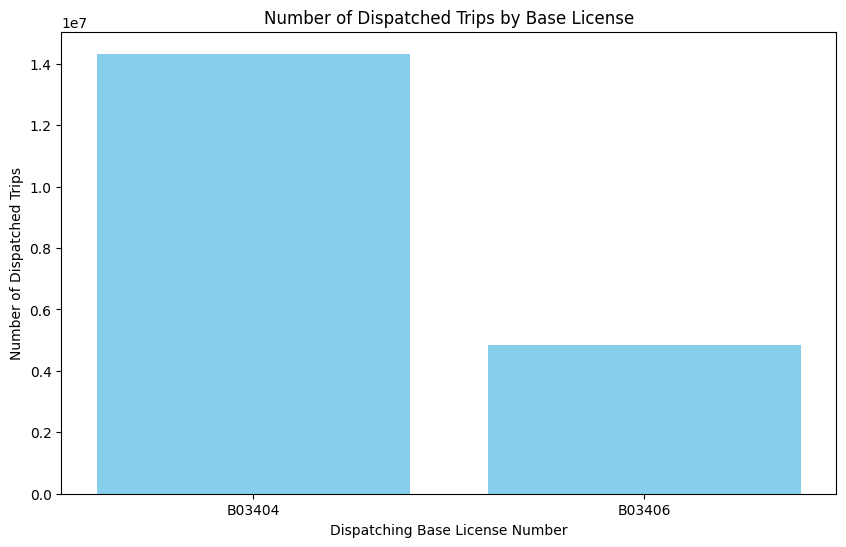

In [18]:
# Count the number of trips for each dispatching base license
base_trip_counts = total_df['dispatching_base_num'].value_counts().reset_index()
base_trip_counts.columns = ['dispatching_base_num', 'trip_count']

# Sort the results in descending order
base_trip_counts = base_trip_counts.sort_values(by='trip_count', ascending=False)

print(base_trip_counts)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(base_trip_counts['dispatching_base_num'], base_trip_counts['trip_count'], color='skyblue')
plt.xlabel('Dispatching Base License Number')
plt.ylabel('Number of Dispatched Trips')
plt.title('Number of Dispatched Trips by Base License')
plt.show()

### 3. What are the top 5 most common pick-up and drop-off locations (PULocationID and DOLocationID)

   Pickup Count  Drop-off Count                       Zone
0        400085          446384          LaGuardia Airport
1        366480          431862                JFK Airport
2        257286          263478        Crown Heights North
3        253138          225086  Times Sq/Theatre District
4        241106          196599               East Village


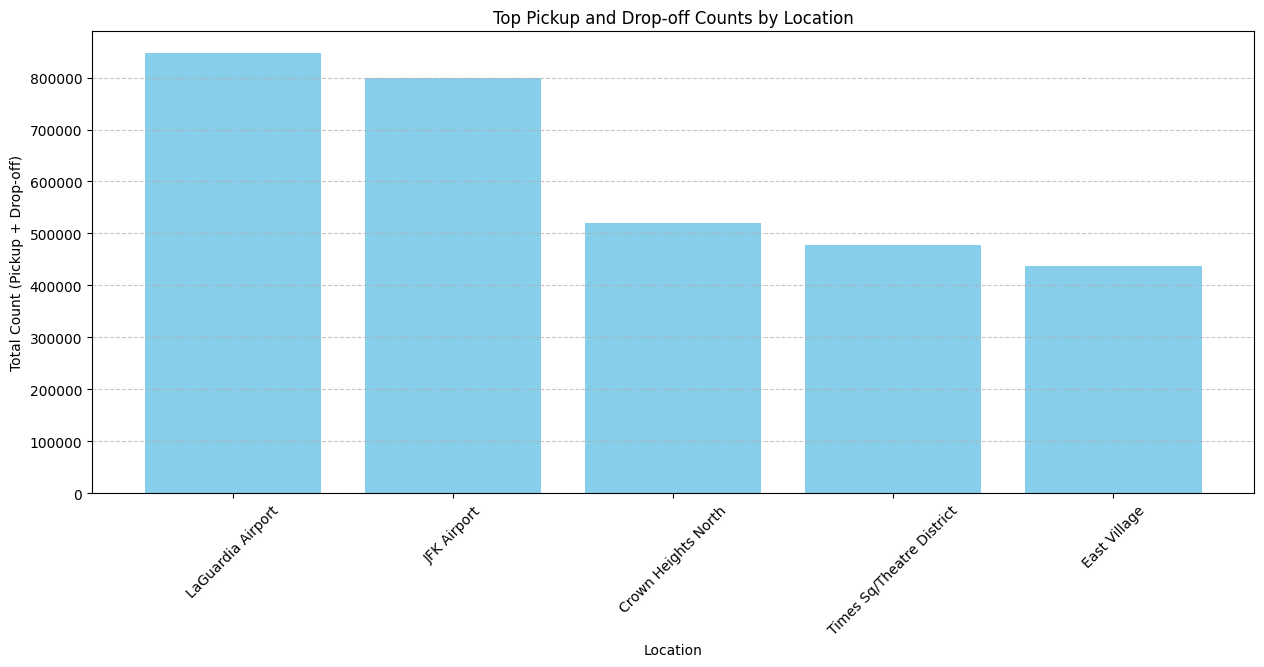

In [19]:
# Count the most common pickup locations
pickup_counts = total_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup Count']

# Count the most common drop-off locations
dropoff_counts = total_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Drop-off Count']

# Merge the two counts to see both pickup and drop-off together
combined_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
combined_counts = combined_counts.sort_values(['Pickup Count', 'Drop-off Count'], ascending=[False, False]).head(5)
combined_counts_with_location = pd.merge(combined_counts, service_zones, on='LocationID', how='left').fillna('').drop(columns=['LocationID', 'Borough', 'service_zone'])
print(combined_counts_with_location)

# Combine pickup and drop-off counts for plotting
combined_counts_with_location['Total Count'] = combined_counts_with_location['Pickup Count'] + combined_counts_with_location['Drop-off Count']
combined_counts_with_location = combined_counts_with_location.sort_values(by='Total Count', ascending=False)

# Plotting the combined counts
plt.figure(figsize=(15, 6))
plt.bar(combined_counts_with_location['Zone'].astype(str), combined_counts_with_location['Total Count'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Count (Pickup + Drop-off)')
plt.title('Top Pickup and Drop-off Counts by Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### 4. What is the average fare (base_passenger_fare) for trips based on different bases (hvfhs_license_num)

  hvfhs_license_num  average_fare
0            HV0003     25.759129
1            HV0005     25.344307


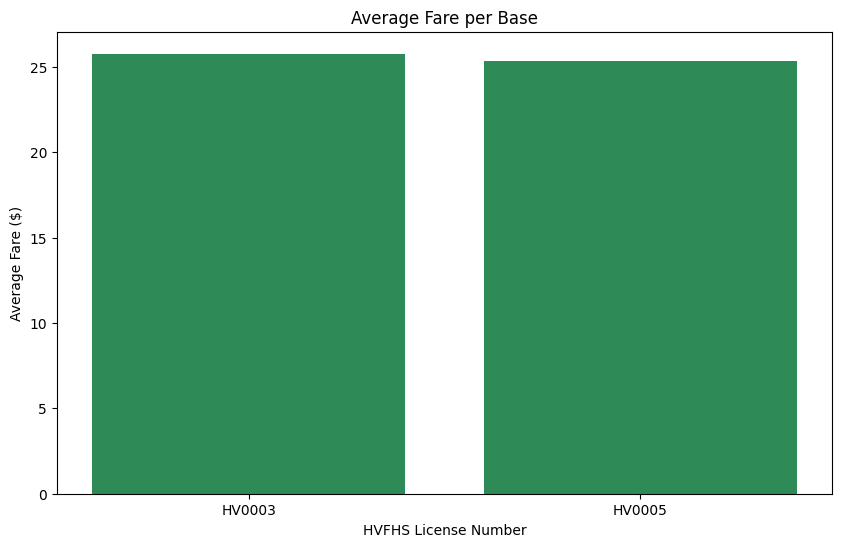

In [45]:
# Calculate the average fare for each base
average_fare_per_base = total_df.groupby('hvfhs_license_num')['base_passenger_fare'].mean().reset_index()
average_fare_per_base.columns = ['hvfhs_license_num', 'average_fare']

print(average_fare_per_base)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(average_fare_per_base['hvfhs_license_num'], average_fare_per_base['average_fare'], color='seagreen')
plt.xlabel('HVFHS License Number')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare per Base')
plt.show()

### 5. How does the average tip amount vary between shared and non-shared rides

  shared_match_flag  average_tip
0                 N     1.144819
1                 Y     0.344146


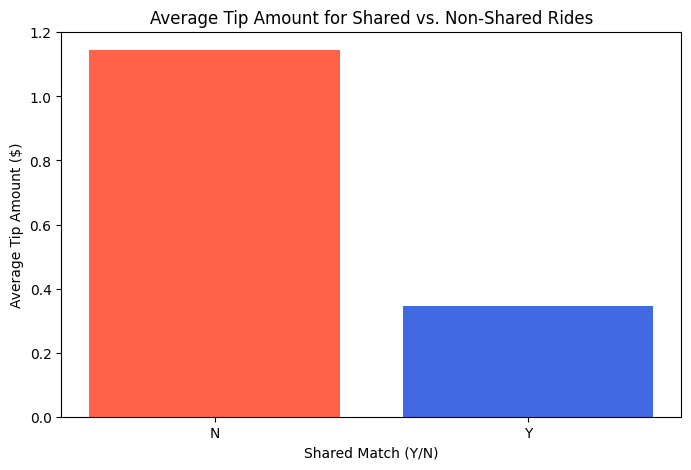

In [21]:
# Calculate the average tip amount for shared and non-shared rides
average_tips = total_df.groupby('shared_match_flag')['tips'].mean().reset_index()
average_tips.columns = ['shared_match_flag', 'average_tip']

print(average_tips)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(average_tips['shared_match_flag'], average_tips['average_tip'], color=['tomato', 'royalblue'])
plt.xlabel('Shared Match (Y/N)')
plt.ylabel('Average Tip Amount ($)')
plt.title('Average Tip Amount for Shared vs. Non-Shared Rides')
plt.xticks(rotation=0)
plt.show()

### 6. What is the total revenue generated from congestion surcharges (congestion_surcharge) for a specified time period

    hour  total_congestion_revenue
0      0                 744750.25
1      1                 529954.75
2      2                 377101.25
3      3                 277493.00
4      4                 260265.00
5      5                 311289.75
6      6                 503444.50
7      7                 692246.00
8      8                 940659.75
9      9                 916435.25
10    10                 830709.75
11    11                 845732.25
12    12                 858780.00
13    13                 880466.25
14    14                 891711.50
15    15                 904796.00
16    16                 957343.50
17    17                1125709.75
18    18                1236864.25
19    19                1180812.50
20    20                1095470.00
21    21                1150305.25
22    22                1159483.00
23    23                 997091.50


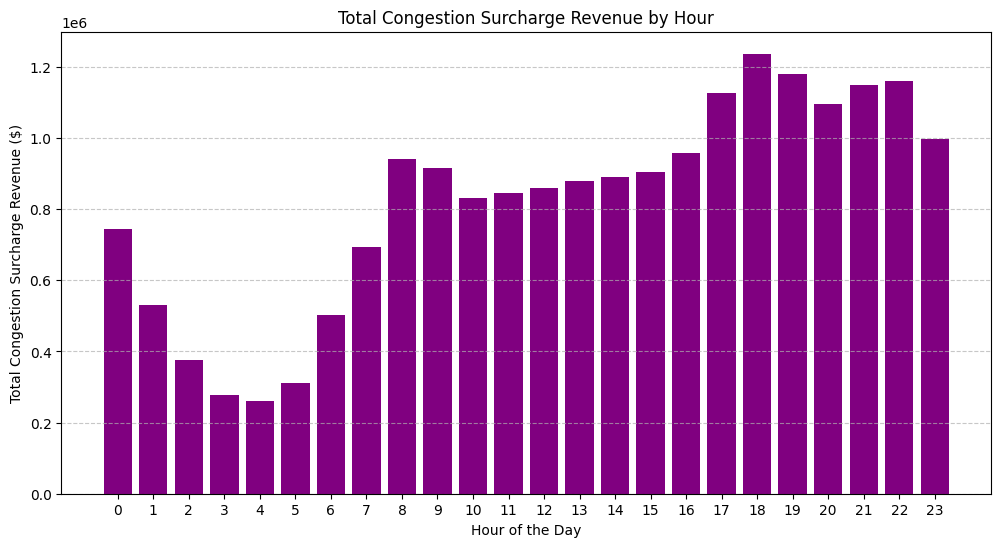

In [22]:
# Convert pickup_datetime to datetime type and extract the hour
total_df['hour'] = pd.to_datetime(total_df['pickup_datetime']).dt.hour

# Calculate the total congestion surcharge for each hour
total_revenue_per_hour = total_df.groupby('hour')['congestion_surcharge'].sum().reset_index()
total_revenue_per_hour.columns = ['hour', 'total_congestion_revenue']

print(total_revenue_per_hour)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(total_revenue_per_hour['hour'], total_revenue_per_hour['total_congestion_revenue'], color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Congestion Surcharge Revenue ($)')
plt.title('Total Congestion Surcharge Revenue by Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 7. Which time of day has the highest number of ride requests (request_datetime)

    hour  number_of_requests
0     18             1116804
1     17             1091222
2     19             1054134
3     22             1035188
4     21             1034920
5     20              989423
6      8              988883
7     16              986134
8     15              944456
9     14              928059
10    23              926361
11     9              896584
12    13              876011
13    12              838204
14    10              822153
15    11              819519
16     7              777484
17     0              705471
18     6              539915
19     1              495687
20     5              364982
21     2              360162
22     4              300156
23     3              291022


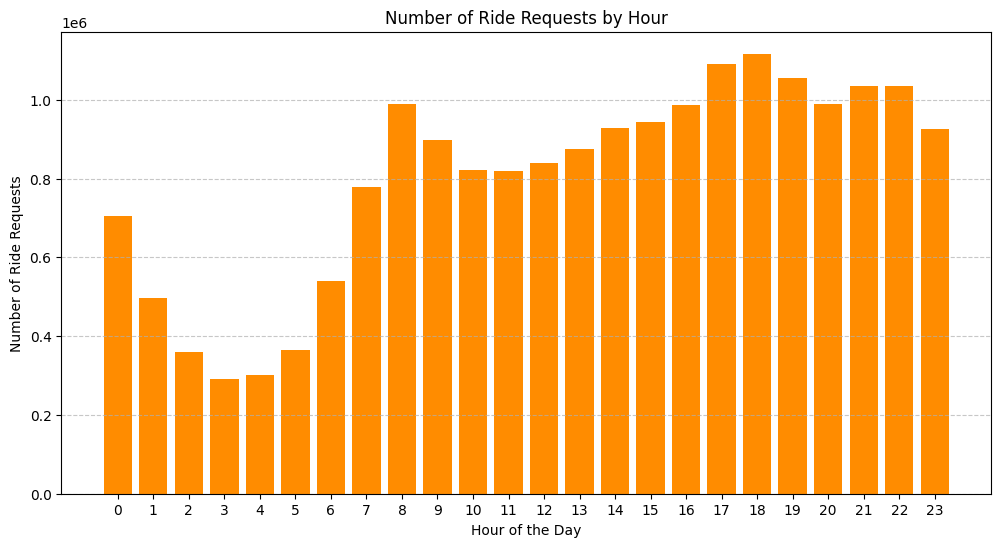

In [23]:
total_df['hour'] = pd.to_datetime(total_df['request_datetime']).dt.hour

# Count the number of ride requests for each hour without sorting
requests_per_hour = total_df['hour'].value_counts().reset_index()
requests_per_hour.columns = ['hour', 'number_of_requests']

print(requests_per_hour)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(requests_per_hour['hour'], requests_per_hour['number_of_requests'], color='darkorange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ride Requests')
plt.title('Number of Ride Requests by Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 8. What is the relationship between trip distance (trip_miles) and trip duration (trip_time)

0.81


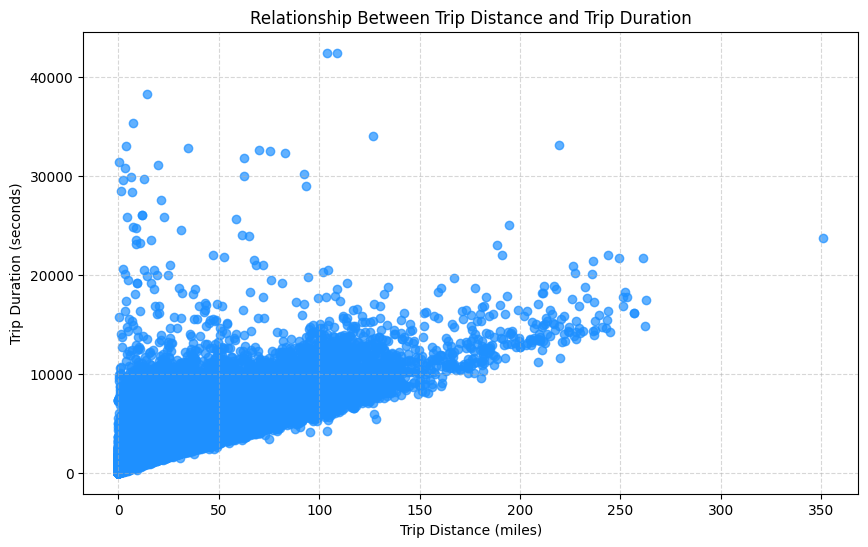

In [26]:
correlation = total_df['trip_miles'].corr(total_df['trip_time'])
print(correlation.round(2))

# Scatter plot to show the relationship between trip distance and trip duration
plt.figure(figsize=(10, 6))
plt.scatter(total_df['trip_miles'], total_df['trip_time'], color='dodgerblue', alpha=0.7)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Relationship Between Trip Distance and Trip Duration')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 9. How frequently do passengers request wheelchair-accessible vehicles (wav_request_flag), and how often are they matched (wav_match_flag)

  wav_request_flag     count
0                N  17414840
1                Y   1768094
  wav_match_flag     count
0              N  17470110
1              Y   1712824
Percentage of passengers requested WAV: 9.22%
Percentage of passengers who requested WAV got a successful match: 96.87%


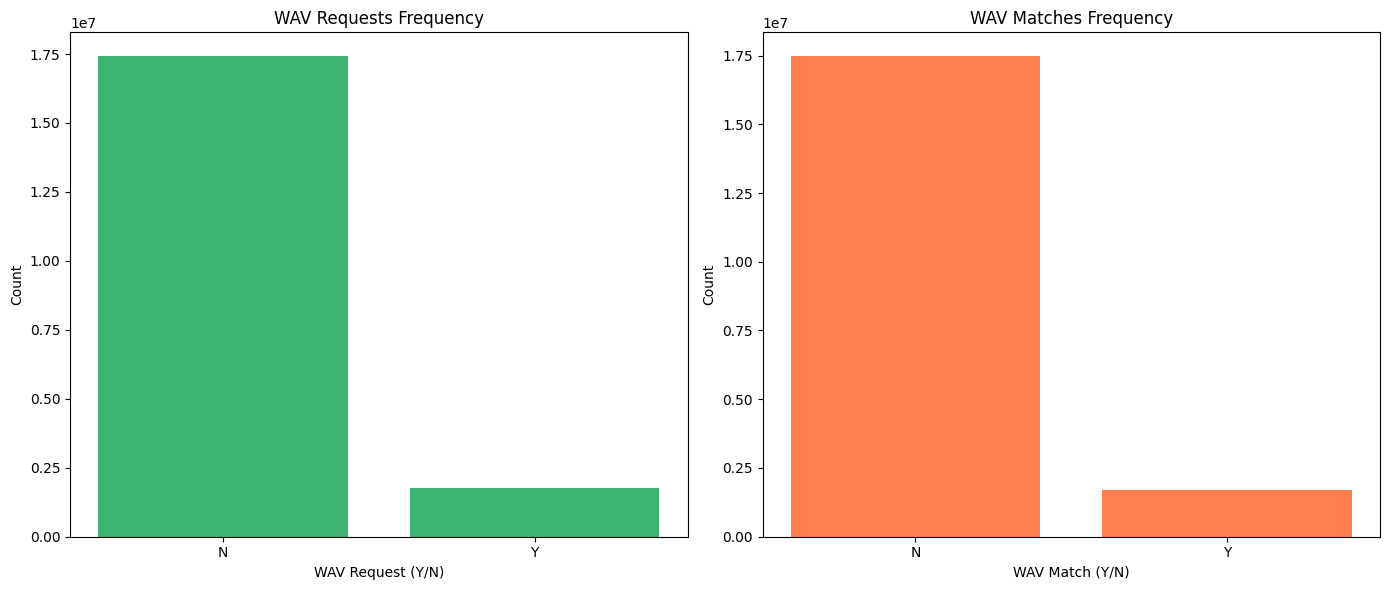

In [39]:
# Calculate the frequency of WAV requests and matches
wav_request_counts = total_df['wav_request_flag'].value_counts().reset_index()
wav_request_counts.columns = ['wav_request_flag', 'count']

wav_match_counts = total_df['wav_match_flag'].value_counts().reset_index()
wav_match_counts.columns = ['wav_match_flag', 'count']

wav_total_requests = wav_request_counts[wav_request_counts['wav_request_flag'] == 'Y']['count'].values[0] + \
                     wav_match_counts[wav_match_counts['wav_match_flag'] == 'Y']['count'].values[0]

# Update the frequency dataframe to reflect the correct total request count
adjusted_wav_request_counts = pd.DataFrame({
    'wav_request_flag': ['N', 'Y'],
    'count': [len(total_df) - wav_total_requests, wav_total_requests]
})

print(adjusted_wav_request_counts)
print(wav_match_counts)

res1 = wav_total_requests / len(total_df) * 100
print(f"Percentage of passengers requested WAV: {res1:.2f}%")
res2 = wav_match_counts[wav_match_counts['wav_match_flag'] == 'Y']['count'].values[0] / wav_total_requests * 100
print(f"Percentage of passengers who requested WAV got a successful match: {res2:.2f}%")

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for WAV requests
ax[0].bar(adjusted_wav_request_counts['wav_request_flag'], adjusted_wav_request_counts['count'], color='mediumseagreen')
ax[0].set_title('WAV Requests Frequency')
ax[0].set_xlabel('WAV Request (Y/N)')
ax[0].set_ylabel('Count')

# Plot for WAV matches
ax[1].bar(wav_match_counts['wav_match_flag'], wav_match_counts['count'], color='coral')
ax[1].set_title('WAV Matches Frequency')
ax[1].set_xlabel('WAV Match (Y/N)')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 10. What is the average driver pay (driver_pay) per mile for each HVFHS base (Hvfhs_license_num)

  hvfhs_license_num  average_pay_per_mile
0            HV0003               5.17828
1            HV0005               5.11253


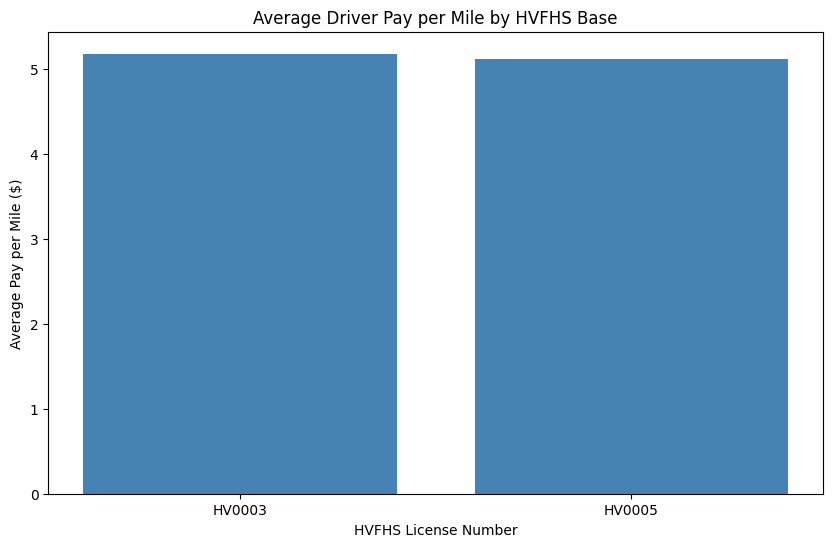

In [44]:
valid_df = total_df.drop(total_df[total_df['trip_miles'] == 0].index)

# Calculate the average driver pay per mile for each base
valid_df['pay_per_mile'] = valid_df['driver_pay'] / valid_df['trip_miles']
average_pay_per_mile = valid_df.groupby('hvfhs_license_num')['pay_per_mile'].mean().reset_index()
average_pay_per_mile.columns = ['hvfhs_license_num', 'average_pay_per_mile']

# Display the average driver pay per mile for each base
print(average_pay_per_mile)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(average_pay_per_mile['hvfhs_license_num'], average_pay_per_mile['average_pay_per_mile'], color='steelblue')
plt.xlabel('HVFHS License Number')
plt.ylabel('Average Pay per Mile ($)')
plt.title('Average Driver Pay per Mile by HVFHS Base')
plt.show()